# importing libraries

In [77]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics
from sklearn import svm

# load data and exploration
The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

1-obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2-alpha = Right Ascension angle (at J2000 epoch)
3-delta = Declination angle (at J2000 epoch)
4-u = Ultraviolet filter in the photometric system
5-g = Green filter in the photometric system
6-r = Red filter in the photometric system
7-i = Near Infrared filter in the photometric system
8-z = Infrared filter in the photometric system
9-run_ID = Run Number used to identify the specific scan
10-rereun_ID = Rerun Number to specify how the image was processed
11-cam_col = Camera column to identify the scanline within the run
12-field_ID = Field number to identify each field
13-spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same 14-spec_obj_ID must share the output class)
14class = object class (galaxy, star or quasar object)
15-redshift = redshift value based on the increase in wavelength
16-plate = plate ID, identifies each plate in SDSS
17-MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18-fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [2]:
df = pd.read_csv('star_classification.csv')

In [3]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
df.shape

(100000, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [6]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [7]:
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['rerun_ID'].value_counts()

301    100000
Name: rerun_ID, dtype: int64

In [10]:
df.describe(include=['O'])

,class
count,100000
unique,3
top,GALAXY
freq,59445


In [11]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

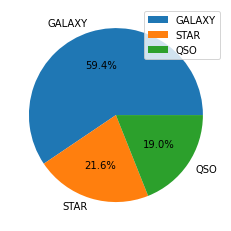

In [12]:
plt.pie(df['class'].value_counts(),autopct="%1.1f%%",labels=['GALAXY','STAR','QSO'])
plt.legend()

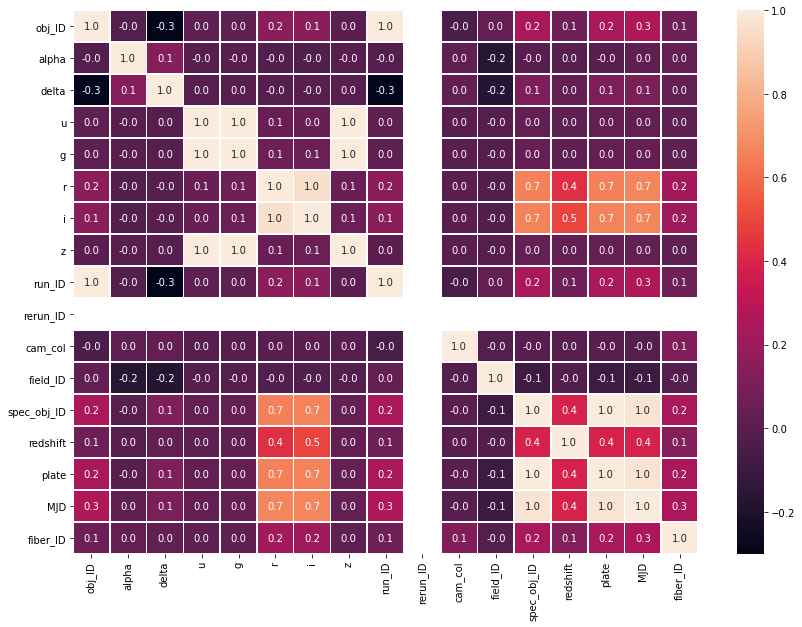

In [13]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

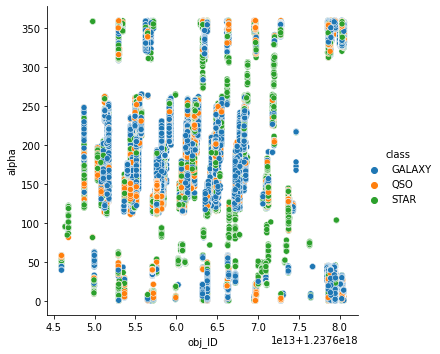

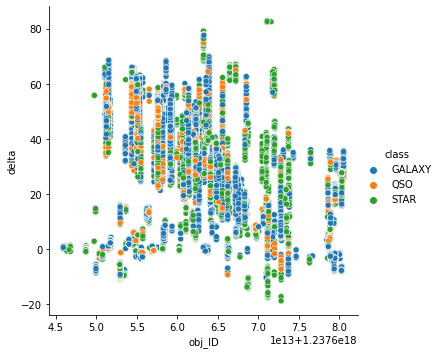

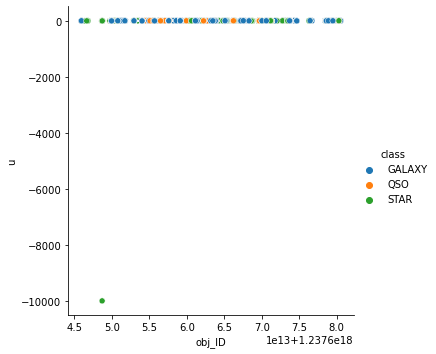

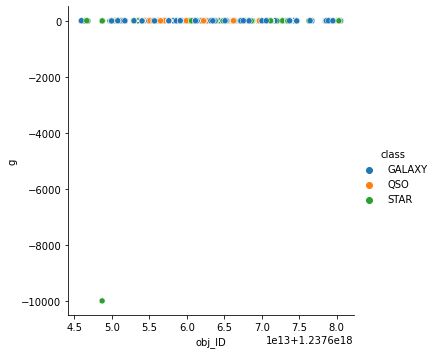

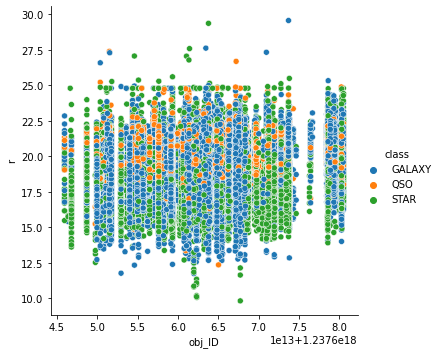

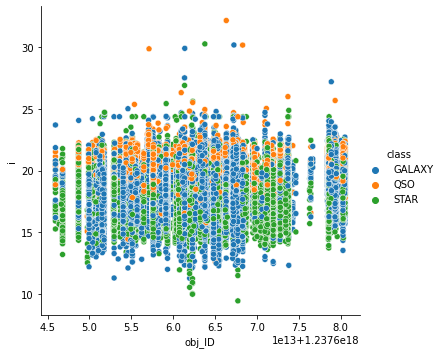

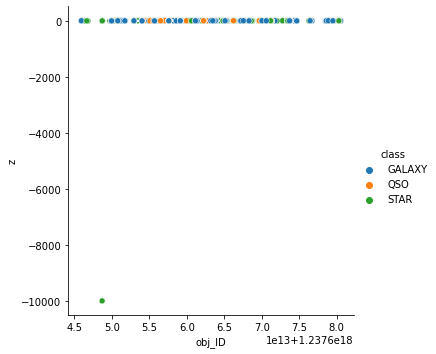

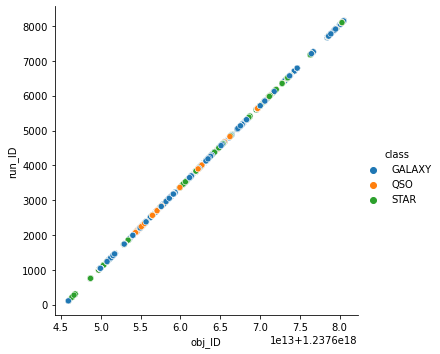

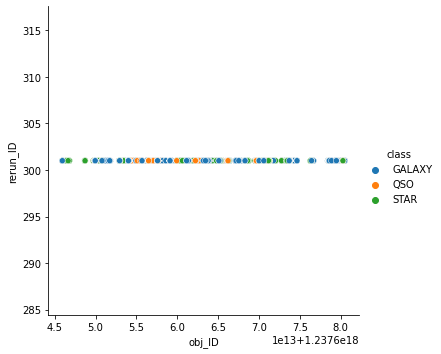

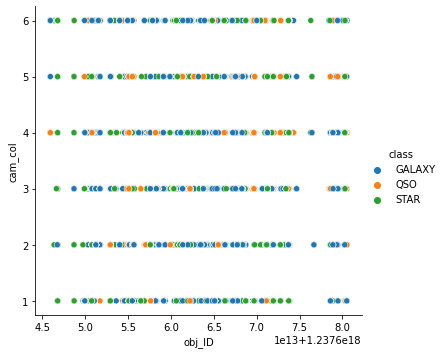

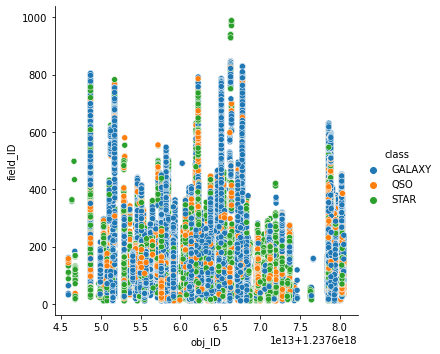

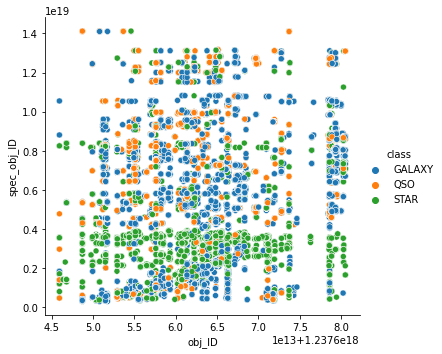

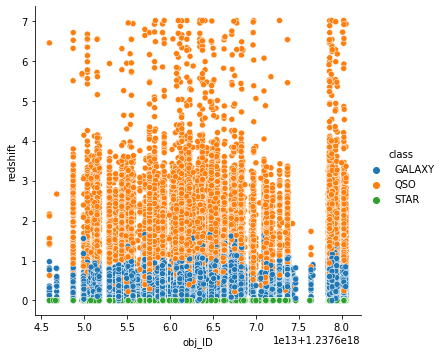

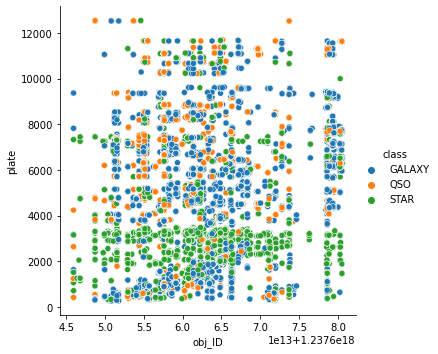

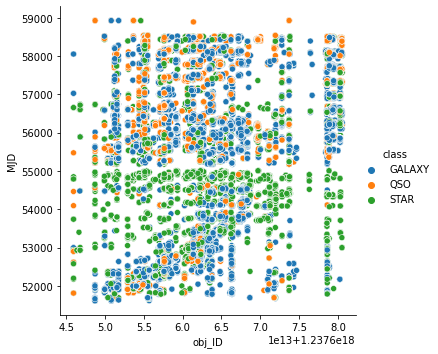

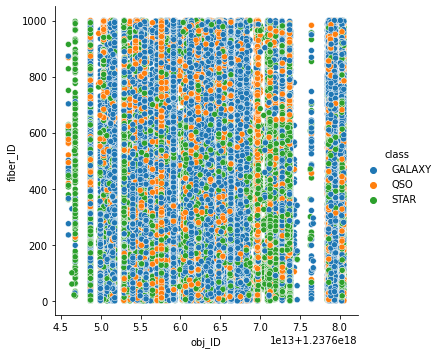

In [14]:
plots=[]
for i in ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
       'plate', 'MJD', 'fiber_ID']:
    g=sns.relplot(data=df,x='obj_ID', y=i, hue='class')
    plots.append(g)

### It is clear that 'u' ,  'g' , 'z' , 'run_ID' , 'rerun_ID' , 'cam_col' are insiginificant and need to removed and 'redshift' plays an important part in the stellar classification

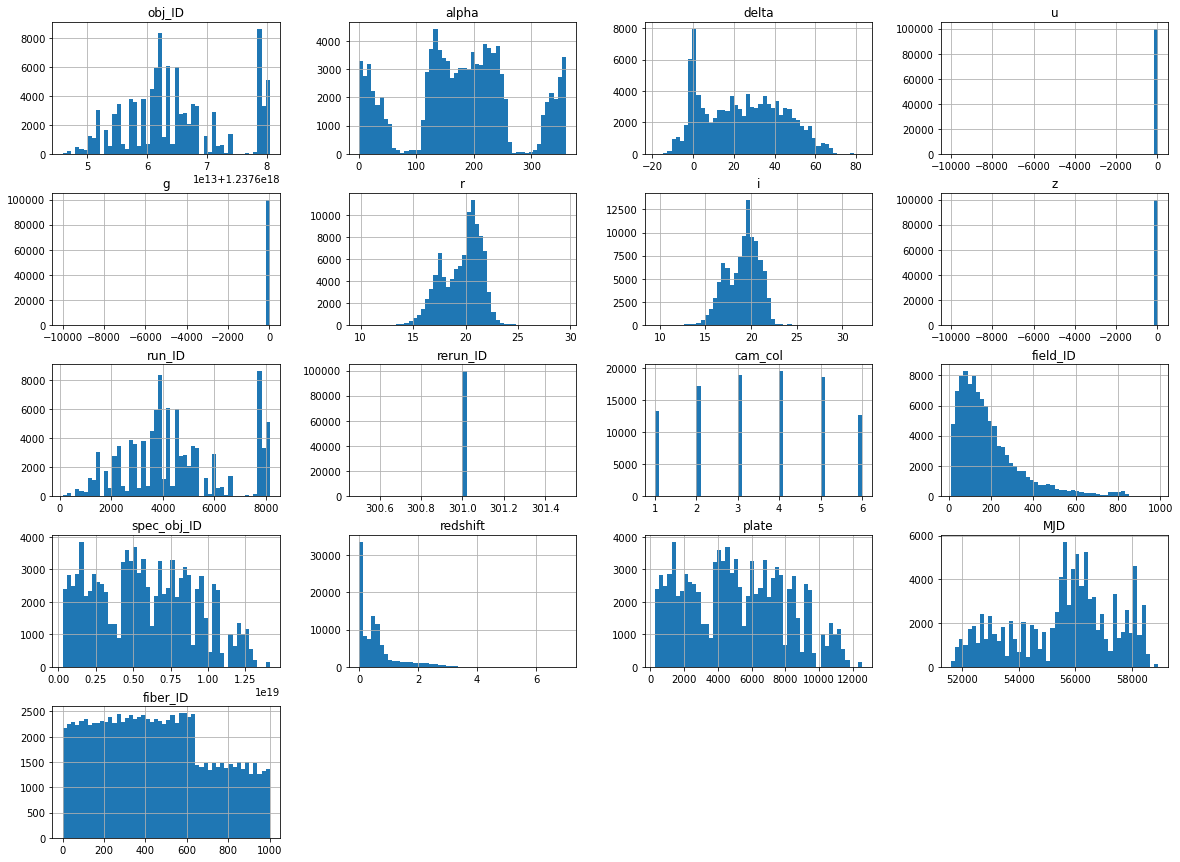

In [15]:
df.hist(bins=50, figsize=(20,15))
plt.show() 

# Data preprosseing

In [16]:
#x,y prepare 
y=df['class']
x = df.drop( ['u','g','z', 'run_ID','rerun_ID', 'cam_col','obj_ID','class'],axis=1)

In [17]:
x.shape

(100000, 10)

In [18]:
y.head()

0    GALAXY
1    GALAXY
2    GALAXY
3    GALAXY
4    GALAXY
Name: class, dtype: object

### deal with categorical data 

In [19]:
encoder = LabelEncoder()

In [20]:
y = encoder.fit_transform(y)

In [21]:
y = pd.DataFrame(y)

In [22]:
y.value_counts()

0    59445
2    21594
1    18961
dtype: int64

### deal with imbalanced data

In [24]:
sm = SMOTE(random_state=42)
x, y = sm.fit_resample(x, y)

In [29]:
y.value_counts()

0    59445
1    59445
2    59445
dtype: int64

### scaler 


In [30]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [32]:
#splirt data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Modeling

In [34]:
#Decision Tree algo
decision_tree = DecisionTreeClassifier(random_state=42)

In [35]:
dt_model = decision_tree.fit(x_train,y_train)

In [37]:
y_pred = dt_model.predict(x_test)

In [38]:
accuracy_score(y_test,y_pred)

0.9698881318866179

In [54]:
cm=metrics.confusion_matrix(y_test,y_pred) 

<AxesSubplot:>

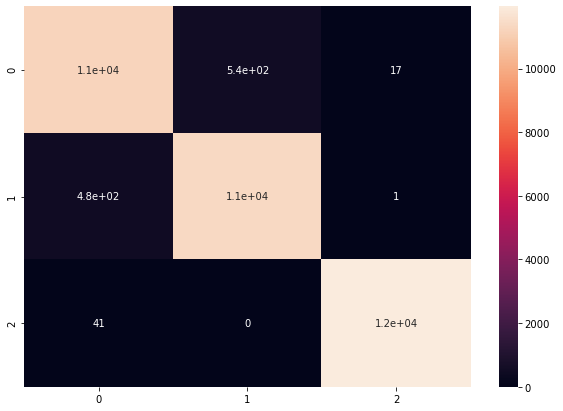

In [55]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)

In [57]:
#RandomForect 
RandomForest= RandomForestClassifier()

In [60]:
RandomForest.fit(x_train, y_train.values.ravel())

RandomForestClassifier()

In [62]:
y_pred = RandomForest.predict(x_test)

In [63]:
accuracy_score(y_test, y_pred)

0.9824207250399529

In [75]:
cm=metrics.confusion_matrix(y_test,y_pred) 

<AxesSubplot:>

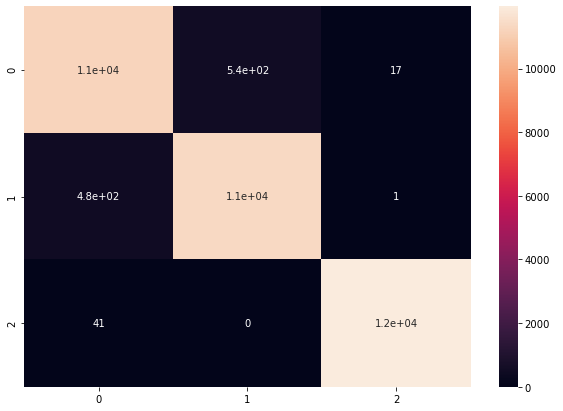

In [76]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)

In [78]:
#svm
svm_clf = svm.SVC(kernel='rbf', random_state=42)

In [81]:
svm_clf.fit(x_train,y_train.values.ravel())

SVC(C=1, random_state=42)

In [82]:
y_pred =svm_clf.predict(x_test)

In [83]:
accuracy_score(y_test, y_pred)

0.9669442341660358

In [84]:
cm=metrics.confusion_matrix(y_test,y_pred) 

<AxesSubplot:>

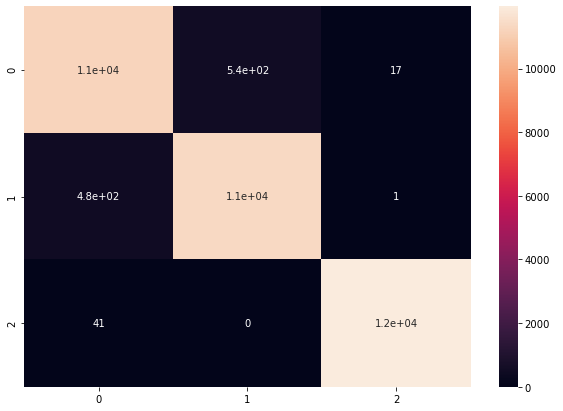

In [85]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)